In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import re

In [2]:
from matplotlib import pyplot as plt

# Helper Functions

In [16]:
def slice_synapses(df, col, val):
    start_values = df[col][~pd.isnull(df[col])]
    start_idxs, = np.where(start_values.values == val)
    sliced = []
    for start_idx in start_idxs:
        try:
            sliced.append(df.loc[start_values.index[start_idx]:start_values.index[start_idx + 1] - 1])
        except IndexError:
            sliced.append(df.loc[start_values.index[start_idx]:])
    return pd.concat(sliced)

# Load in Data

In [252]:
ANALYSIS_PATH = Path("/Volumes/Charlie's P/Charlie/imaging_analysis")
synpases_dir = ANALYSIS_PATH / "synapses"
gen_data_dir = "../gen_data/"
lc10a_file_right = 'root_ids_cell_type_equal_LC10a_and_side_equal_right.txt'
lc10a_file_left = 'root_ids_cell_type_equal_LC10a_and_side_equal_left.txt'
dict_lc10_root_ids = {}
root_ids_lc10a_right = list(pd.read_csv(gen_data_dir+lc10a_file_right).columns)
root_ids_lc10a_left = list(pd.read_csv(gen_data_dir+lc10a_file_left).columns)

In [253]:
len(root_ids), len(root_ids_lc10a_right), len(root_ids_lc10a_left)

(237, 121, 116)

In [188]:
synpases_dir

PosixPath("/Volumes/Charlie's P/Charlie/imaging_analysis/synapses")

In [189]:
# codex_syn = pd.read_csv(synpases_dir / "synapse_coordinates_from_codex.csv", dtype='Int64')
# scsv_path = '/Users/charliehuang/Documents/murthy_lab/projects/on_the_fly/albert_fdasynapses_copy/v783/all_syn/synapse_coordinates_from_codex.csv'
codex_syn = pd.read_csv(synpases_dir / "synapse_coordinates_from_codex.csv", dtype={'pre_root_id': 'str', 'post_root_id': 'str'})

In [191]:
codex_syn_def = pd.read_csv(synpases_dir / "synapse_coordinates_from_codex.csv")

# Synapse Slicing

In [134]:
def slice_synapses(df, col, val):
    start_values = df[col][~pd.isnull(df[col])]
    start_idxs, = np.where(start_values.values == val)
    sliced = []
    for start_idx in start_idxs:
        try:
            sliced.append(df.loc[start_values.index[start_idx]:start_values.index[start_idx + 1] - 1])
        except IndexError:
            sliced.append(df.loc[start_values.index[start_idx]:])
    return pd.concat(sliced)

In [ ]:
exid = root_ids[5]
slice_synapses(codex_syn, 'pre_root_id', exid).index

,pre_root_id,post_root_id,x,y,z
3560695,720575940612499662,720575940611694034,636244,155232,51640
3560696,NaN,NaN,636602,165468,60180
3560697,NaN,NaN,639164,166496,60900
3560698,NaN,NaN,645734,157736,55880
3560699,NaN,NaN,651340,158694,57640
...,...,...,...,...,...
3560983,NaN,NaN,650910,158556,57640
3560984,NaN,NaN,661926,164640,54260
3560985,NaN,NaN,666774,169114,66480
3560986,NaN,NaN,666872,169146,66700


In [ ]:
root_id_dict_right = {}
for i,root in enumerate(root_ids_lc10a_right):
    print(i,root)
    dend_df = slice_synapses(codex_syn, 'post_root_id', root)
    bout_df = slice_synapses(codex_syn, 'pre_root_id', root)
    root_id_dict_right[root] = {'dendrites': dend_df.index, 'boutons': bout_df.index}
print("NOW FOR LEFT")


0 720575940643207191
1 720575940621562918
2 720575940629856312
3 720575940629985849
4 720575940617424468
5 720575940621183587
6 720575940619169901
7 720575940634156655
8 720575940627676798
9 720575940606099586
10 720575940610131093
11 720575940629669531
12 720575940631963300
13 720575940621365417
14 720575940612499662
15 720575940622655709
16 720575940636234473
17 720575940618567425
18 720575940622950663
19 720575940616337181
20 720575940624013606
21 720575940636302143
22 720575940637344590
23 720575940634433887
24 720575940634599269
25 720575940617102715
26 720575940635263383
27 720575940623212988
28 720575940621086157
29 720575940612236241
30 720575940615833574
31 720575940615834086
32 720575940621710826
33 720575940650450934
34 720575940628895232
35 720575940625442306
36 720575940613561868
37 720575940623448078
38 720575940613429782
39 720575940645077527
40 720575940644133911
41 720575940624186407
42 720575940615044136
43 720575940630500394
44 720575940630879274
45 72057594062918814

In [255]:
root_id_dict_left = {}
for i, root in enumerate(root_ids_lc10a_left):
    print(i,root)
    dend_df = slice_synapses(codex_syn, 'post_root_id', root)
    bout_df = slice_synapses(codex_syn, 'pre_root_id', root)
    root_id_dict_left[root] = {'dendrites': dend_df.index, 'boutons': bout_df.index}

0 720575940630545483
1 720575940625781946
2 720575940628786908
3 720575940624055559
4 720575940626812715
5 720575940606114732
6 720575940618606040
7 720575940610227162
8 720575940623174152
9 720575940607520777
10 720575940627575825
11 720575940627428907
12 720575940629291063
13 720575940632415800
14 720575940615858747
15 720575940619973185
16 720575940631381575
17 720575940627371599
18 720575940629852239
19 720575940631195217
20 720575940617498708
21 720575940620644437
22 720575940627743833
23 720575940621189214
24 720575940638145651
25 720575940619921524
26 720575940610506872
27 720575940620778623
28 720575940648420996
29 720575940627692677
30 720575940648669828
31 720575940621780104
32 720575940622184072
33 720575940627095177
34 720575940617879710
35 720575940621436581
36 720575940619009195
37 720575940635460270
38 720575940636563630
39 720575940611298995
40 720575940634276532
41 720575940623350453
42 720575940623751861
43 720575940625588412
44 720575940604389054
45 72057594061925753

In [258]:
root_id_dict_right  = cp_root_id_dict_right

In [263]:
import pickle as pkl
with open(gen_data_dir + 'root_id_dict_lc10a_right.pkl', 'wb') as f:
    pkl.dump(root_id_dict_right, f)
with open(gen_data_dir + 'root_id_dict_lc10a_left.pkl', 'wb') as f:
    pkl.dump(root_id_dict_left, f)

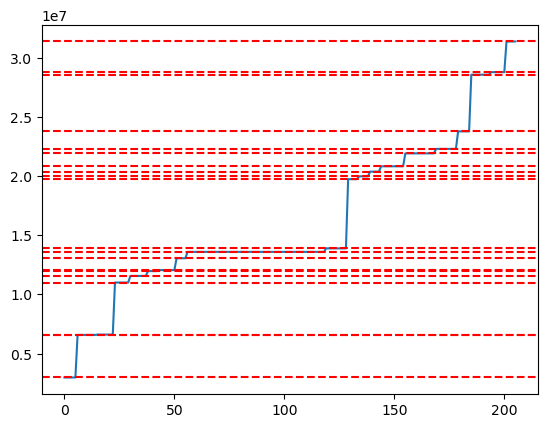

In [153]:
zetaind = matching_rows_post.index
indicesoi = dend_df['post_root_id'].index

plt.plot(indicesoi)
for zeta in zetaind:
    plt.axhline(zeta, color='red', linestyle='--')

In [14]:
pre_ids = codex_syn["pre_root_id"].values
pre_full = np.zeros_like(pre_ids)
i = 0
for ids in np.split(pre_ids, np.where(~np.isnan(pre_ids))[0])[1:]:
    pre_full[i:i + len(ids)] = ids[0]
    i += len(ids)

In [15]:
pre_full

array([7.20575941e+17, 7.20575941e+17, 7.20575941e+17, ...,
       7.20575941e+17, 7.20575941e+17, 7.20575941e+17])

In [7]:
post_ids = codex_syn["post_root_id"].values
post_full = np.zeros_like(post_ids)
i = 0
for ids in np.split(post_ids, np.where(~np.isnan(post_ids))[0])[1:]:
    post_full[i:i + len(ids)] = ids[0]
    i += len(ids)

In [8]:
codex_syn["pre_root_id"] = pre_full
codex_syn["post_root_id"] = post_full

# Load in FDA

In [ ]:
import os

def extract_number(filename):
    match = re.search(r'\d+', str(filename))
    return int(match.group()) if match else float('inf')

synaps_files = os.listdir(synpases_dir)
synaps_files = [f for f in synaps_files if f.endswith('.npy')]
synaps_files = sorted(synaps_files, key=extract_number)
fda_list = []
for f in synaps_files:
    fda_list.append(np.load(synpases_dir / f))
fda_list = np.concatenate(fda_list, axis=0)

# Visualizations in FDA space

In [317]:
syn_files = list(synpases_dir.glob(f"*.npy"))

def extract_number(filename):
    match = re.search(r'\d+', str(filename))
    return int(match.group()) if match else float('inf')

all_fda = []
for f in sorted(syn_files, key=extract_number):
    all_fda.append(np.load(f))
all_fda = np.concatenate(all_fda)

In [198]:
lc14a1_ids = pd.read_csv(gen_data_dir + "search_results_cell_type_equal_LC14a1.csv", dtype=str)
lc14a1_ids_r = lc14a1_ids[lc14a1_ids["side"] == "right"]["root_id"].values
lc14a1_ids_l = lc14a1_ids[lc14a1_ids["side"] == "left"]["root_id"].values

In [298]:
root_id_dict_LC14a_left = {}
for i, root in enumerate(lc14a1_ids_l):
    print(i,root)
    dend_df = slice_synapses(codex_syn, 'post_root_id', root)
    bout_df = slice_synapses(codex_syn, 'pre_root_id', root)
    root_id_dict_LC14a_left[root] = {'dendrites': dend_df.index, 'boutons': bout_df.index}

0 720575940612204949
1 720575940607915698
2 720575940609180718
3 720575940613351018
4 720575940620544239
5 720575940620913493
6 720575940621006672
7 720575940621258198
8 720575940622366814
9 720575940627151050
10 720575940627854162
11 720575940628982268
12 720575940633201223
13 720575940640064573
14 720575940646058094


In [300]:
root_id_dict_LC14a_right = {}
for i, root in enumerate(lc14a1_ids_r):
    print(i,root)
    dend_df = slice_synapses(codex_syn, 'post_root_id', root)
    bout_df = slice_synapses(codex_syn, 'pre_root_id', root)
    root_id_dict_LC14a_right[root] = {'dendrites': dend_df.index, 'boutons': bout_df.index}

0 720575940614231277
1 720575940619251182
2 720575940621096583
3 720575940621680041
4 720575940622037139
5 720575940622368477
6 720575940626390549
7 720575940627758744
8 720575940629474307
9 720575940629502224
10 720575940630882131
11 720575940633471583
12 720575940635014807
13 720575940638642776
14 720575940648131460


## Saving FDA 3d coords for each cell

In [321]:
def load_fda_coords(root_id_dict, fda_matrix):
    fda_dict = {}
    for root_id in root_id_dict.keys():
        dendrites = root_id_dict[root_id]['dendrites']
        boutons = root_id_dict[root_id]['boutons']
        fda_dends = fda_matrix[dendrites]
        fda_boutons = fda_matrix[boutons]
        print(f"Root ID: {root_id}, Dendrites: {len(dendrites)}, {fda_dends.shape}, Boutons: {len(boutons)}, {fda_boutons.shape}")
        fda_dict[root_id] = {'dendrites': fda_dends, 'boutons': fda_boutons}
    return fda_dict

In [322]:
fda_dict_lc14a_left = load_fda_coords(root_id_dict_LC14a_left, all_fda)
fda_dict_lc14a_right = load_fda_coords(root_id_dict_LC14a_right, all_fda)

Root ID: 720575940612204949, Dendrites: 758, (758, 3), Boutons: 1072, (1072, 3)
Root ID: 720575940607915698, Dendrites: 995, (995, 3), Boutons: 1309, (1309, 3)
Root ID: 720575940609180718, Dendrites: 676, (676, 3), Boutons: 1070, (1070, 3)
Root ID: 720575940613351018, Dendrites: 668, (668, 3), Boutons: 1029, (1029, 3)
Root ID: 720575940620544239, Dendrites: 518, (518, 3), Boutons: 1028, (1028, 3)
Root ID: 720575940620913493, Dendrites: 787, (787, 3), Boutons: 989, (989, 3)
Root ID: 720575940621006672, Dendrites: 756, (756, 3), Boutons: 890, (890, 3)
Root ID: 720575940621258198, Dendrites: 637, (637, 3), Boutons: 833, (833, 3)
Root ID: 720575940622366814, Dendrites: 706, (706, 3), Boutons: 1190, (1190, 3)
Root ID: 720575940627151050, Dendrites: 145, (145, 3), Boutons: 688, (688, 3)
Root ID: 720575940627854162, Dendrites: 720, (720, 3), Boutons: 942, (942, 3)
Root ID: 720575940628982268, Dendrites: 908, (908, 3), Boutons: 1290, (1290, 3)
Root ID: 720575940633201223, Dendrites: 588, (588,

In [323]:
fda_dict_lc10a_left = load_fda_coords(root_id_dict_left, all_fda)
fda_dict_lc10a_right = load_fda_coords(root_id_dict_right, all_fda)

Root ID: 720575940630545483, Dendrites: 116, (116, 3), Boutons: 168, (168, 3)
Root ID: 720575940625781946, Dendrites: 286, (286, 3), Boutons: 380, (380, 3)
Root ID: 720575940628786908, Dendrites: 76, (76, 3), Boutons: 213, (213, 3)
Root ID: 720575940624055559, Dendrites: 57, (57, 3), Boutons: 70, (70, 3)
Root ID: 720575940626812715, Dendrites: 201, (201, 3), Boutons: 415, (415, 3)
Root ID: 720575940606114732, Dendrites: 176, (176, 3), Boutons: 401, (401, 3)
Root ID: 720575940618606040, Dendrites: 266, (266, 3), Boutons: 546, (546, 3)
Root ID: 720575940610227162, Dendrites: 171, (171, 3), Boutons: 332, (332, 3)
Root ID: 720575940623174152, Dendrites: 85, (85, 3), Boutons: 167, (167, 3)
Root ID: 720575940607520777, Dendrites: 177, (177, 3), Boutons: 322, (322, 3)
Root ID: 720575940627575825, Dendrites: 101, (101, 3), Boutons: 219, (219, 3)
Root ID: 720575940627428907, Dendrites: 109, (109, 3), Boutons: 222, (222, 3)
Root ID: 720575940629291063, Dendrites: 57, (57, 3), Boutons: 66, (66, 3

In [326]:
with open(gen_data_dir + 'fda_dict_lc10a_left.pkl', 'wb') as f:
    pkl.dump(fda_dict_lc10a_left, f)
with open(gen_data_dir + 'fda_dict_lc10a_right.pkl', 'wb') as f:
    pkl.dump(fda_dict_lc10a_right, f)
with open(gen_data_dir + 'fda_dict_lc14a_left.pkl', 'wb') as f:
    pkl.dump(fda_dict_lc14a_left, f)
with open(gen_data_dir + 'fda_dict_lc14a_right.pkl', 'wb') as f:
    pkl.dump(fda_dict_lc14a_right, f)

## example vis

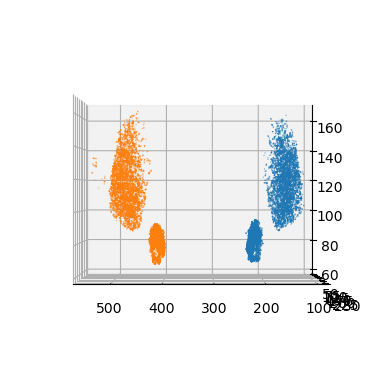

In [333]:
zeta = []
for key in fda_dict_lc10a_left:
    zeta.append(fda_dict_lc10a_left[key]['dendrites'])
zeta = np.concatenate(zeta, axis=0)
zeta2 = []
for key in fda_dict_lc10a_right:
    zeta2.append(fda_dict_lc10a_right[key]['dendrites'])
zeta2 = np.concatenate(zeta2, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zeta.T, s=1, alpha=0.5, lw=0)
ax.scatter(*zeta2.T, s=1, alpha=0.5, lw=0)
ax.view_init(0, 90, 0)


## Prep and visualize all dends boutons

In [307]:
def prep_right_left_dends_boutons(root_id_dict_right, root_id_dict_left):
    right_indices_b = []
    left_indices_b = []
    right_indices_d = []
    left_indices_d = []
    for root in root_id_dict_right.keys():
        boutons = root_id_dict_right[root]['boutons']
        right_indices_b.extend(boutons)
    for root in root_id_dict_left.keys():
        boutons = root_id_dict_left[root]['boutons']
        left_indices_b.extend(boutons)
    for root in root_id_dict_right.keys():
        dendrites = root_id_dict_right[root]['dendrites']
        right_indices_d.extend(dendrites)
    for root in root_id_dict_left.keys():
        dendrites = root_id_dict_left[root]['dendrites']
        left_indices_d.extend(dendrites)
    output_dict = {'dendrites_right': right_indices_d, 'dendrites_left': left_indices_d,
                   'boutons_right': right_indices_b, 'boutons_left': left_indices_b}
    return output_dict

indices_dict_lc14a = prep_right_left_dends_boutons(root_id_dict_LC14a_right, root_id_dict_LC14a_left)
indices_dict_lc10a = prep_right_left_dends_boutons(root_id_dict_right, root_id_dict_left)

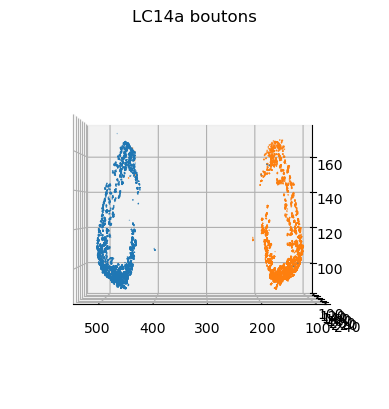

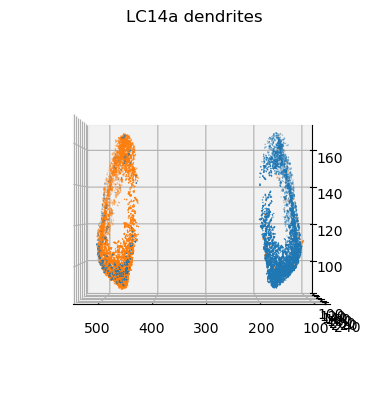

In [319]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('LC14a boutons')
ax.scatter(*all_fda[indices_dict_lc14a['boutons_left']].T, lw=0, s=1)
ax.scatter(*all_fda[indices_dict_lc14a['boutons_right']].T, lw=0, s=1)
ax.view_init(0, 90, 0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('LC14a dendrites')
ax.scatter(*all_fda[indices_dict_lc14a['dendrites_left']].T, lw=0, s=1)
ax.scatter(*all_fda[indices_dict_lc14a['dendrites_right']].T, lw=0, s=1)
ax.view_init(0, 90, 0)

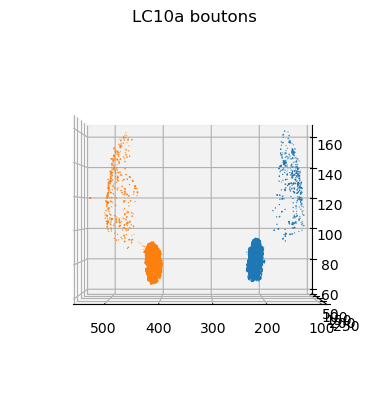

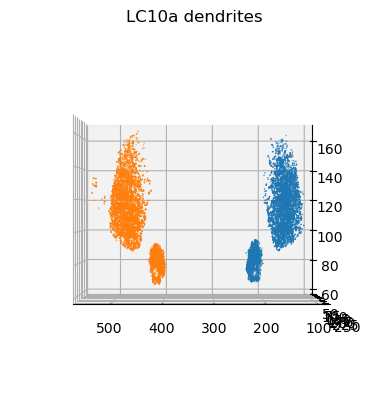

In [320]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('LC10a boutons')
ax.scatter(*all_fda[indices_dict_lc10a['boutons_left']].T, lw=0, s=1)
ax.scatter(*all_fda[indices_dict_lc10a['boutons_right']].T, lw=0, s=1)
ax.view_init(0, 90, 0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('LC10a dendrites')
ax.scatter(*all_fda[indices_dict_lc10a['dendrites_left']].T, lw=0, s=1)
ax.scatter(*all_fda[indices_dict_lc10a['dendrites_right']].T, lw=0, s=1)
ax.view_init(0, 90, 0)

In [ ]:
right_indices_lc10a_b = []
for root in root_id_dict_right.keys():
    boutons = root_id_dict_right[root]['boutons']
    right_indices_lc10a_b.extend(boutons)
left_indices_lc10a_b = []
for root in root_id_dict_left.keys():
    boutons = root_id_dict_left[root]['boutons']
    left_indices_lc10a_b.extend(boutons)
    
right_indices_lc10a_d = []
for root in root_id_dict_right.keys():
    dendrites = root_id_dict_right[root]['dendrites']
    right_indices_lc10a_d.extend(dendrites)
left_indices_lc10a_d = []
for root in root_id_dict_left.keys():
    dendrites = root_id_dict_left[root]['dendrites']
    left_indices_lc10a_d.extend(dendrites)

In [ ]:
right_indices_1c14a_b = []
for root in lc14a1_ids_r:
    boutons = root_id_dict_right[root]['boutons'] #here
    right_indices_1c14a_b.extend(boutons)
left_indices_1c14a_b = []
for root in lc14a1_ids_l:
    boutons = root_id_dict_left[root]['boutons'] #here
    left_indices_1c14a_b.extend(boutons)

'720575940630545483'

Index([ 2443669,  2443670,  2443671,  2443672,  2443673,  5195162,  5195163,
        5195164,  5195165,  5195166,
       ...
       30739553, 30739554, 30739555, 30739556, 30739557, 33859592, 33859593,
       33859594, 33859595, 33859596],
      dtype='int64', length=116)

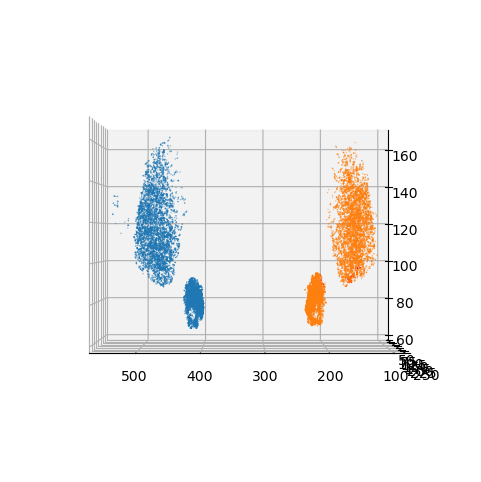

In [285]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

example = root_id_dict_left[root_ids_lc10a_left[0]]

ax.scatter(*all_fda[right_indices_lc10a_d].T, lw=0, s=1, alpha=0.5, label='Dendrites Right')
ax.scatter(*all_fda[left_indices_lc10a_d].T, lw=0, s=1, alpha=0.5
           )
ax.scatter(*all_fda[example['dendrites']].T, lw=0, s=1, c='red', label='Dendrites')
ax.scatter(*all_fda[example['boutons']].T, lw=0, s=1, c='red', label='Dendrites')

ax.view_init(0, 90,0)

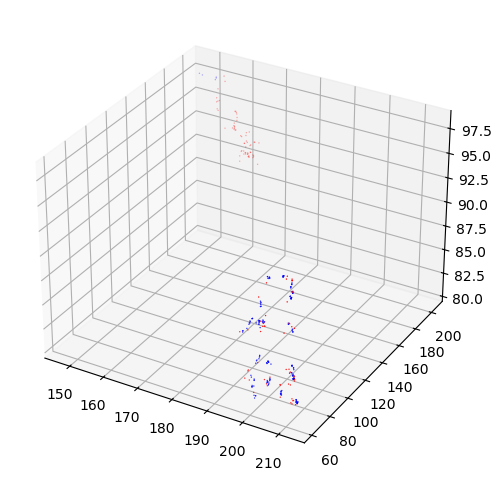

In [290]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*all_fda[example['dendrites']].T, lw=0, s=1, c='red', label='Dendrites')
ax.scatter(*all_fda[example['boutons']].T, lw=0, s=1, c='blue', label='Dendrites')

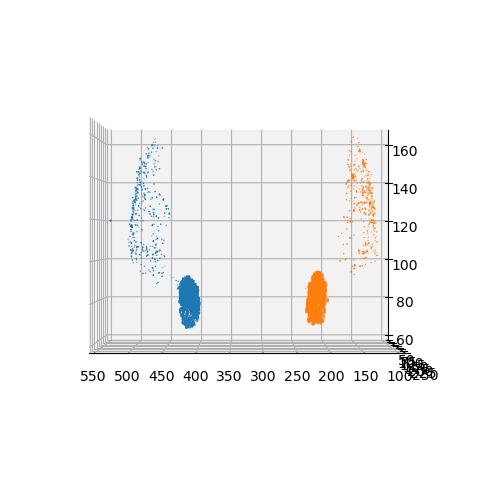

In [274]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*all_fda[right_indices_lc10a_b].T, lw=0, s=1)
ax.scatter(*all_fda[left_indices_lc10a_b].T, lw=0, s=1)
ax.view_init(0, 90, 0)

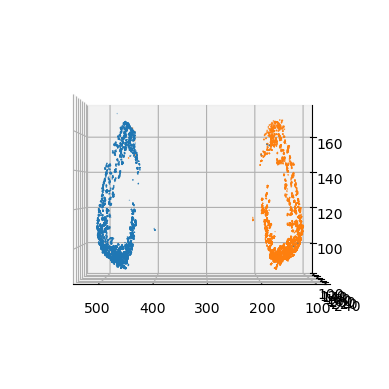